In [1]:
# Day 6: Basic Modeling – Predicting EV adoption
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# For ML
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [4]:
# Load merged dataset (from Day 3)
data = pd.read_csv(r"C:\Users\Saket\OneDrive\Desktop\4th sem\python\EDA\EV_Market_Analysis\data\processed\ev_merged_cleaned.csv")

# Quick peek
data.head()


,country,iso_code,year,ev_share,population,total_chargers,charger_density_per_100k,population_million
0,Australia,AUS,2011,0.0061,22479723.0,0.0,0.0,22.479723
1,Australia,AUS,2012,0.0290,22852597.0,0.0,0.0,22.852597
2,Australia,AUS,2013,0.0330,23236224.0,0.0,0.0,23.236224
3,Australia,AUS,2014,0.1500,23595552.0,0.0,0.0,23.595552
4,Australia,AUS,2015,0.1900,23947955.0,0.0,0.0,23.947955


In [5]:
# Drop rows with missing values in key columns
model_data = data.dropna(subset=["ev_share", "population_million", "total_chargers", "charger_density_per_100k"])

# Features (X) and target (y)
X = model_data[["population_million", "total_chargers", "charger_density_per_100k"]]
y = model_data["ev_share"]

print("Dataset size:", X.shape, y.shape)


Dataset size: (444, 3) (444,)


In [6]:
# Split into train (80%) and test (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

print("Train size:", X_train.shape[0], "| Test size:", X_test.shape[0])


Train size: 355 | Test size: 89


In [7]:
# Standardize features for better regression stability
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [8]:
# Train Linear Regression
lr = LinearRegression()
lr.fit(X_train_scaled, y_train)

# Predictions
y_pred = lr.predict(X_test_scaled)

# Evaluation
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print("Linear Regression Performance:")
print("MSE:", round(mse, 2))
print("R² Score:", round(r2, 3))


Linear Regression Performance:
MSE: 253.56
R² Score: -0.012


In [9]:
# Show coefficients for interpretation
feature_importance = pd.DataFrame({
    "Feature": X.columns,
    "Coefficient": lr.coef_
}).sort_values(by="Coefficient", ascending=False)

feature_importance


,Feature,Coefficient
1,total_chargers,56.875417
0,population_million,-0.801219
2,charger_density_per_100k,-57.140197


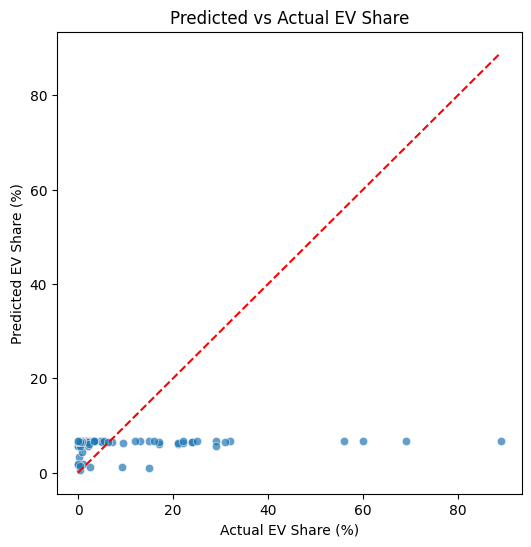

In [10]:
plt.figure(figsize=(6,6))
sns.scatterplot(x=y_test, y=y_pred, alpha=0.7)
plt.xlabel("Actual EV Share (%)")
plt.ylabel("Predicted EV Share (%)")
plt.title("Predicted vs Actual EV Share")
plt.plot([0, max(y_test)], [0, max(y_test)], color="red", linestyle="--")
plt.show()


In [11]:
print("🔍 Interpretation:")
print(f"- R² Score {round(r2, 3)} means the model explains {round(r2*100,1)}% of EV adoption variation.")
print("- Positive coefficients → higher values increase EV adoption.")
print("- Negative coefficients → higher values reduce EV adoption.")
print("This gives insight into whether population or chargers drive adoption more strongly.")


🔍 Interpretation:
- R² Score -0.012 means the model explains -1.2% of EV adoption variation.
- Positive coefficients → higher values increase EV adoption.
- Negative coefficients → higher values reduce EV adoption.
This gives insight into whether population or chargers drive adoption more strongly.
